MNIST 99% with CNN

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Conv layer 1

In [2]:
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 3x3x1, # of filter = 32
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                   strides=[1, 2, 2, 1], padding='SAME')
print(X_img)
print(L1)

Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


Conv layer 2

In [3]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01)) # 3x3x32, # of filter = 64
#    Conv     -> (?, 14, 14, 64)
#    Pool     -> (?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                   strides=[1, 2, 2, 1], padding='SAME')
print(L2)
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])

Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


fully connected (FC, Dense) layer

In [4]:
# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b

# define cost/loss & optimizer
learning_rate=0.01
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [5]:
# parameters
training_epochs = 15
batch_size = 100

sess = tf.Session()

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={
            X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print("Learning finished")

Epoch: 0001 cost = 0.161971083
Epoch: 0002 cost = 0.055197374
Epoch: 0003 cost = 0.041133466
Epoch: 0004 cost = 0.034964055
Epoch: 0005 cost = 0.028375878
Epoch: 0006 cost = 0.027252907
Epoch: 0007 cost = 0.025916533
Epoch: 0008 cost = 0.020793477
Epoch: 0009 cost = 0.018405764
Epoch: 0010 cost = 0.021672236
Epoch: 0011 cost = 0.019643281
Epoch: 0012 cost = 0.022166276
Epoch: 0013 cost = 0.021312488
Epoch: 0014 cost = 0.017069116
Epoch: 0015 cost = 0.021448674
Learning finished


In [6]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Test the model using test sets
batch_num = int(mnist.test.num_examples / batch_size)
test_accuracy = 0
for i in range(batch_num):
    batch_xs, batch_ys = mnist.test.next_batch(batch_size)
    test_accuracy += sess.run(accuracy, feed_dict = {
        X : batch_xs, Y: batch_ys})
test_accuracy /= batch_num
print("Accuracy: ", test_accuracy)

Accuracy:  0.9835000103712082


Label:  [1]
Prediction:  [1]


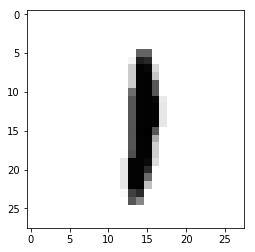

In [7]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(
    mnist.test.images[r:r + 1].reshape(28, 28),
    cmap='Greys',
    interpolation='nearest')
plt.show()

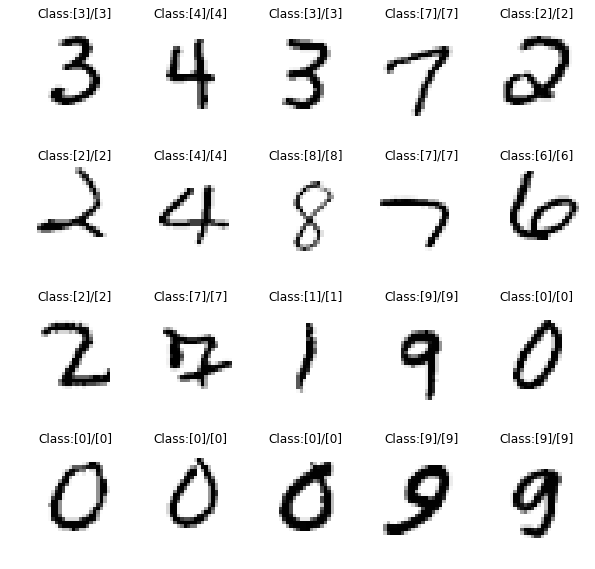




STOP? (Y/N)


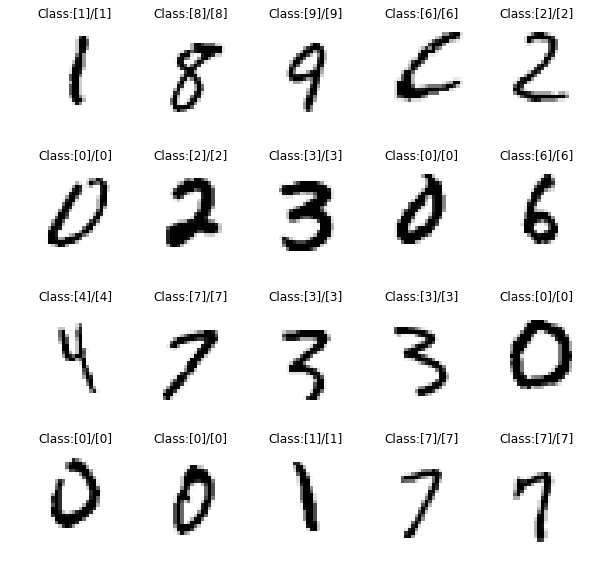




STOP? (Y/N)


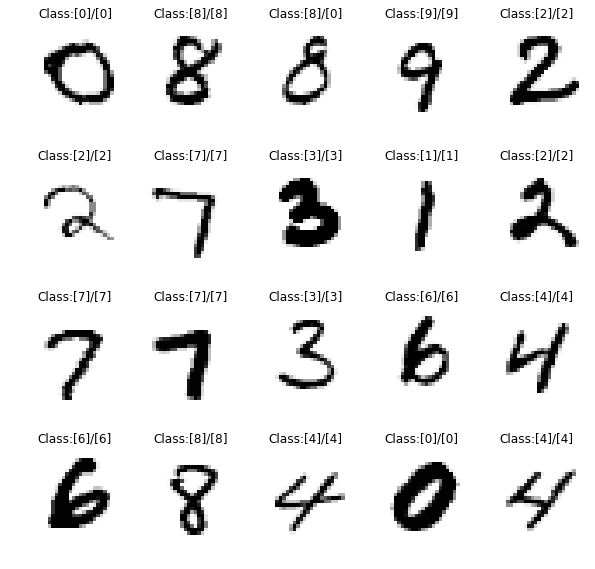




STOP? (Y/N)


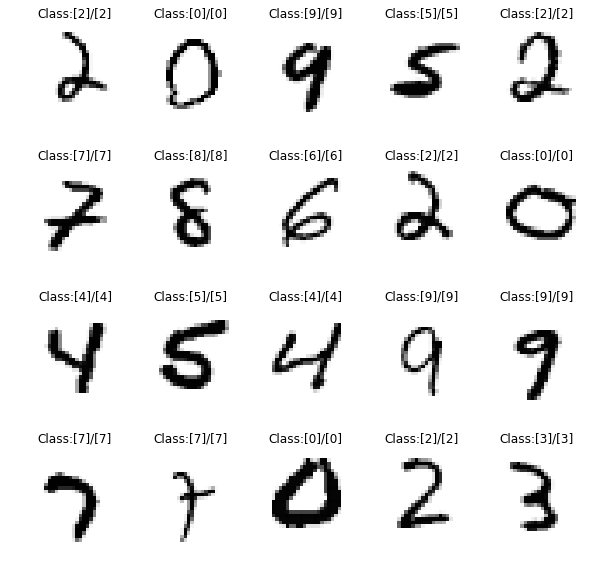




STOP? (Y/N)


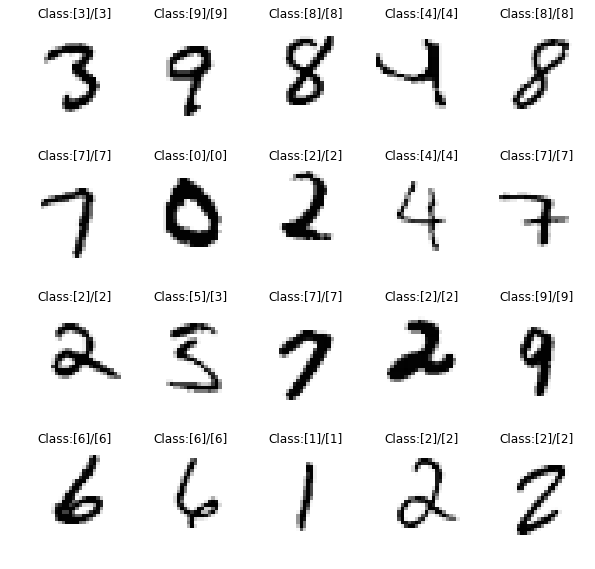




STOP? (Y/N)n


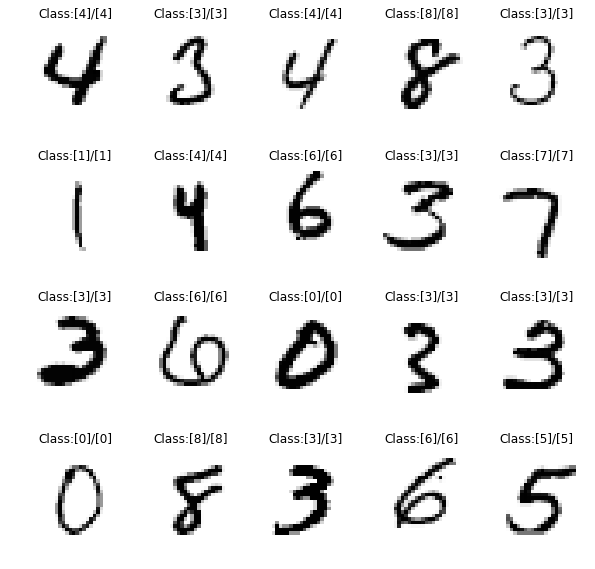

In [ ]:
while True:
    # How to resize figure in multiple plots : refer to 'StackOverFlow'
    # https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
    
    fig = plt.figure(figsize=(10, 10))
    for i in range(20):
        rnd = random.randint(0, mnist.test.num_examples - 1)
        img = mnist.test.images[rnd:rnd+1].reshape(28,28)
        label = sess.run(tf.argmax(mnist.test.labels[rnd:rnd+1], 1))
        pred = sess.run(
            tf.argmax(hypothesis, 1), 
            feed_dict={X: mnist.test.images[rnd:rnd + 1]})
      
        fig.add_subplot(4, 5, i+1)
        plt.grid(False)
        plt.axis('off')

        plt.imshow(img, cmap='Greys', interpolation='nearest')
        plt.title("Class:{}/{}".format(label, pred))

    plt.show()
    if input("\n\n\nSTOP? (Y/N)").lower().startswith('y'):
        break